### **Problem Statement: Credit Card Fraud Detection**
In today’s digital world, credit card transactions are a crucial part of financial activities. However, with the increasing number of online transactions, credit card fraud has become a significant concern for financial institutions and consumers. Fraudulent transactions result in substantial financial losses and can undermine customer trust in banking systems.

The objective of this project is to develop a machine learning model that can accurately detect fraudulent transactions from real-world credit card transaction data. The dataset contains highly imbalanced classes, where fraudulent transactions are rare compared to legitimate ones. The challenge is to apply appropriate data preprocessing techniques, handle class imbalance, and implement effective machine learning models to maximize fraud detection while minimizing false positives.

### **This project involves**:

- **Data Preprocessing**: Cleaning the dataset, handling missing values, and scaling numerical features.

- **Handling Class Imbalance**: Applying techniques such as oversampling, undersampling, or SMOTE to address the imbalance in fraudulent and legitimate transactions.

- **Feature Engineering**: Selecting and engineering relevant features to improve model performance.

- **Model Training & Evaluation**: Training various machine learning models, including logistic regression, decision trees, random forests, and deep learning approaches, and evaluating their performance using precision, recall, F1-score, and AUC-ROC.

The final model should efficiently detect fraudulent transactions with high accuracy while maintaining a low false positive rate, ensuring a secure and reliable financial transaction system.

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


In [21]:
df= pd.read_csv("creditcard.csv")

##### **Exploring the Credit Card Fraud Detection Dataset**  

Before building a machine learning model for credit card fraud detection, it is crucial to explore and understand the dataset. This process involves analyzing the structure, distribution, and key characteristics of the data to identify potential challenges and opportunities for feature engineering and model development.  

**1. Dataset Overview**  
The credit card fraud detection dataset typically consists of transaction records, including numerical features extracted using PCA (Principal Component Analysis) to ensure data privacy. It includes the following attributes:  
- **Time:** The time elapsed since the first transaction in the dataset.  
- **V1 to V28:** Anonymized numerical features representing transaction characteristics.  
- **Amount:** The transaction amount, which may influence fraudulent activity.  
- **Class:** The target variable (0 = legitimate transaction, 1 = fraudulent transaction).  

**2. Data Distribution & Class Imbalance**  
Since fraudulent transactions are rare, the dataset is highly imbalanced. A key part of exploration involves checking the proportion of fraud and non-fraud transactions. Visualization techniques like bar charts or pie charts help in understanding the imbalance and planning strategies to handle it.  

 **3. Statistical Analysis**  
Exploring summary statistics (mean, median, standard deviation) of features provides insights into data trends and potential anomalies. Box plots and histograms can reveal patterns in transaction amounts and feature distributions.  

 **4. Feature Correlation Analysis**  
- Checking feature correlation using a heatmap helps identify relationships between different variables.  
- Understanding how features contribute to fraudulent transactions can guide feature selection.  

 **5. Handling Missing & Duplicate Data**  
- Checking for missing values ensures data quality and completeness.  
- Identifying duplicate transactions helps in avoiding redundant or misleading patterns.  

 **6. Data Visualization**  
- **Distribution plots** for transaction amounts to analyze spending behavior.  
- **Time-based analysis** to detect fraud trends over different hours or days.  
- **T-SNE or PCA visualization** to check how fraud and non-fraud transactions are distributed in a lower-dimensional space.  

Exploring the dataset thoroughly helps in designing preprocessing techniques and selecting the right machine learning models for effective fraud detection.

In [22]:
print("\n Dataset Overview:")
df.head()


 Dataset Overview:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
df.shape

(284807, 31)

In [24]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [27]:
class_unique_vals = df['Class'].value_counts()
print(f'Normal: {class_unique_vals[0]}')
print(f'Fraud: {class_unique_vals[1]}')


Normal: 284315
Fraud: 492


C:\Users\HOME\AppData\Local\Temp\ipykernel_15112\4243362832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Class"], y=df["Amount"], palette=["green", "red"])


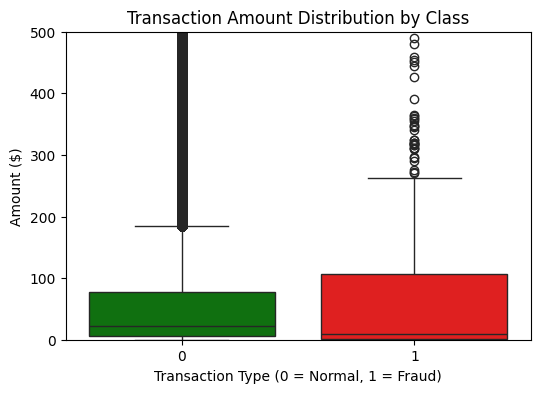

In [28]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Class"], y=df["Amount"], palette=["green", "red"])
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Transaction Type (0 = Normal, 1 = Fraud)")
plt.ylabel("Amount ($)")
plt.ylim(0, 500) 
plt.show()


## **Transaction Amount Distribution by Class**  

The box plot above illustrates the distribution of transaction amounts for both normal (0) and fraudulent (1) transactions. Here are some key observations:  

- **Most Transactions Have Low Amounts:**  
  - The majority of both normal and fraudulent transactions involve small amounts.  

- **Presence of Outliers:**  
  - Some normal transactions have significantly higher amounts, indicating outliers.  
  - Fraudulent transactions also show a few outliers, but their amounts are relatively lower.  

- **No Clear Distinction in Transaction Amounts:**  
  - Fraudulent transactions do not show a significantly different amount range from normal transactions.  
  - This suggests that **transaction amount alone is not a strong indicator of fraud**.  


C:\Users\HOME\AppData\Local\Temp\ipykernel_15112\350516244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=["Normal", "Fraud"], y=class_counts.values, palette=["green", "red"])


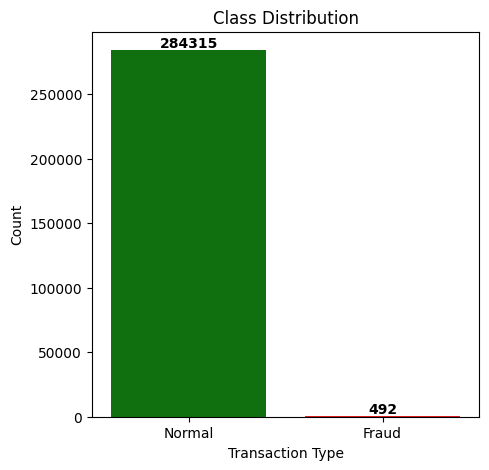

In [29]:
# Count the occurrences of each class
class_counts = df["Class"].value_counts()

# Create the bar plot
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=["Normal", "Fraud"], y=class_counts.values, palette=["green", "red"])

# Annotate bars with values
for i, value in enumerate(class_counts.values):
    ax.text(i, value + 20, str(value), ha='center', va='bottom', fontweight='bold')

# Labels and title
plt.title("Class Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


Class Imbalance in Credit Card Fraud Detection **Dataset**
The dataset contains a total of **284,807** transactions, with:

- **284,315** legitimate (normal) transactions

- **492** fraudulent transactions

### Preprocessing for Credit Card Fraud Detection**
Data preprocessing is a crucial step in building an effective credit card fraud detection model. It involves cleaning, transforming, and preparing the dataset to enhance the model’s performance. Below are the key preprocessing steps applied to the dataset:

1. **Handling Missing and Duplicate Values**
- Checking for missing values and handling them appropriately to ensure data completeness.

- Removing duplicate transactions, if any, to prevent data redundancy and model bias.

2. **Feature Scaling**
- Since the dataset contains numerical features (V1 to V28) obtained through Principal Component Analysis (PCA), they are already standardized.

- However, the "Amount" feature is not transformed. We apply Min-Max Scaling or Standardization to normalize transaction amounts, ensuring all features have a similar scale and improving model convergence.

3. **Handling Class Imbalance**
- The dataset is highly imbalanced, with fraudulent transactions constituting only 0.17% of the total data.

- To address this, we apply Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic fraud samples. This helps balance the dataset and prevents the model from being biased toward the majority class.

4. **Splitting the Dataset**
- The data is split into training and testing sets, typically in an 80:20 ratio, to evaluate the model’s performance on unseen data.

- We ensure stratified sampling to maintain the original fraud-to-normal transaction ratio in both training and testing sets.

5. **Feature Selection and Engineering**
- Analyzing correlations between features to remove any redundant or less important variables.

- If needed, we perform dimensionality reduction techniques like PCA or t-SNE to improve model efficiency.

- By implementing these preprocessing steps, we ensure that our dataset is clean, balanced, and well-structured for training an accurate and reliable fraud detection model.

In [30]:
# Step 3: Preprocessing
df = df.drop(columns=["Time"], axis=0) 

# Standardize 'Amount' column
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

# Splitting dataset
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handling Class Imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

C:\Users\HOME\AppData\Local\Temp\ipykernel_15112\3420648012.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=["Normal", "Fraud"], y=smote_class_counts.values, palette=["green", "red"])


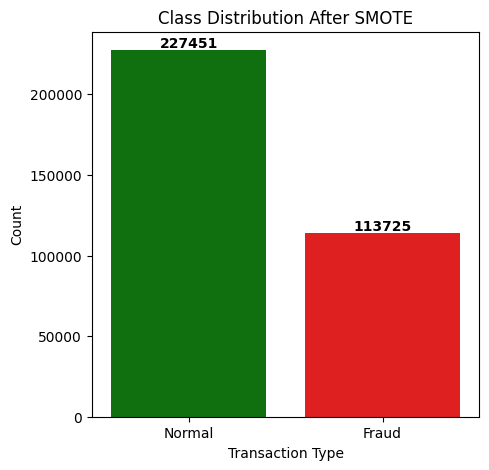

In [31]:
# Count occurrences after SMOTE
smote_class_counts = pd.Series(y_train_smote).value_counts()

# Create the bar plot
plt.figure(figsize=(5, 5))
ax = sns.barplot(x=["Normal", "Fraud"], y=smote_class_counts.values, palette=["green", "red"])

# Annotate bars with values
for i, value in enumerate(smote_class_counts.values):
    ax.text(i, value + 20, str(value), ha='center', va='bottom', fontweight='bold')

# Labels and title
plt.title("Class Distribution After SMOTE")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

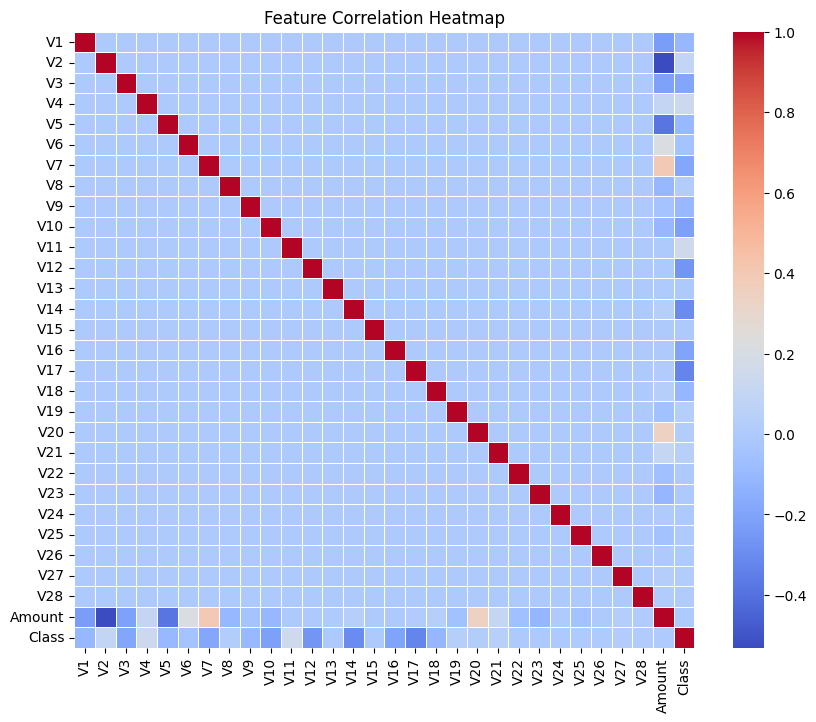

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


## **Feature Correlation Heatmap - Key Observations**  

### **1. Low Correlation Between Features**  
- Most features show very low correlation with each other, as seen from the predominantly blue color.  
- This suggests that there are no strong linear dependencies among the features.  

### **2. Diagonal Red Line (Self-Correlation)**  
- The red diagonal represents the correlation of each feature with itself (**correlation = 1**), which is expected.  

### **3. Weak Correlation Between Features and Target (Class)**  
- The **"Class"** variable (fraud or normal) does not have a strong correlation with most features.  
- This means that no single feature alone can effectively determine fraud.  
- However, some features show slight correlations, which can be useful for fraud detection.  

### **4. Transaction Amount Has Low Correlation with Other Features**  
- The **"Amount"** feature does not exhibit strong correlation with any other variables.  
- This reinforces that **transaction amount alone is not a reliable fraud indicator**.  


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9865173273410344
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.91      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



## **Model Performance Evaluation**  

### **Accuracy:**  
- **98.65%**  

### **Classification Report:**  

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Normal Transactions)** | 1.00 | 0.99 | 0.99 | 56,864 |
| **1 (Fraud Transactions)** | 0.10 | 0.91 | 0.19 | 98 |

### **Overall Metrics:**  

| Metric        | Score |
|--------------|-------|
| **Accuracy**  | 0.99  |
| **Macro Avg** | **Precision:** 0.55, **Recall:** 0.95, **F1-Score:** 0.59 |
| **Weighted Avg** | **Precision:** 1.00, **Recall:** 0.99, **F1-Score:** 0.99 |

### **Key Observations:**  
- **High Accuracy (98.65%)**: The model performs well overall, but accuracy alone is misleading due to class imbalance.  
- **Class Imbalance Impact**:  
  - The model detects normal transactions with high precision and recall.  
  - Fraud detection is poor (**Precision: 0.10, F1-Score: 0.19**) despite a **Recall of 0.91**, meaning that while most frauds are detected, many false positives occur.  
- **Need for Improvement**:  
  - Apply techniques like **SMOTE (Synthetic Minority Over-sampling)** to balance the dataset.  
  - Experiment with **cost-sensitive learning** or **ensemble methods** to improve fraud detection.  


In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# Credit Card Fraud Detection - Classification Report

**Accuracy:** 0.9995084442259752

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0** (Non-Fraud) | 1.00 | 1.00 | 1.00 | 56864 |
| **1** (Fraud) | 0.88 | 0.83 | 0.85 | 98 |

### Overall Metrics:
- **Accuracy:** 1.00
- **Macro Avg:** Precision: 0.94, Recall: 0.91, F1-Score: 0.93
- **Weighted Avg:** Precision: 1.00, Recall: 1.00, F1-Score: 1.00

> **Observation:** The model performs exceptionally well in detecting non-fraudulent transactions but has slightly lower recall for fraudulent cases. This might indicate a class imbalance issue.


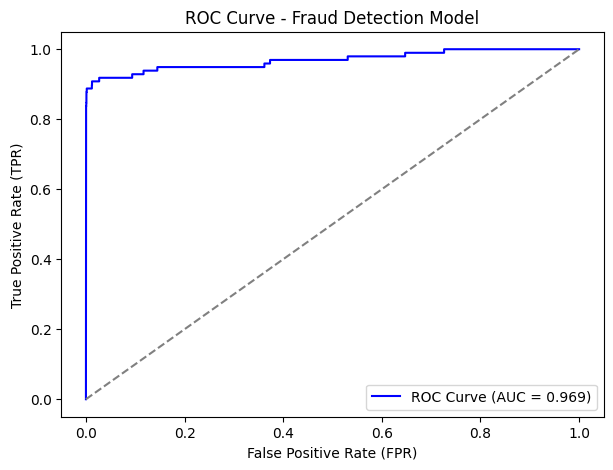

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label="ROC Curve (AUC = {:.3f})".format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='gray', linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Fraud Detection Model")
plt.legend()
plt.show()


## **ROC Curve - Fraud Detection Model**  

The **Receiver Operating Characteristic (ROC) Curve** evaluates the model's performance in distinguishing between fraudulent and normal transactions.  

### **Key Observations:**  
- The **ROC curve (blue line)** shows the trade-off between the **True Positive Rate (TPR)** and **False Positive Rate (FPR)**.  
- The **dashed diagonal line** represents a random classifier (**AUC = 0.5**), while a perfect classifier would have an **AUC = 1.0**.  
- Our model achieves an **AUC (Area Under Curve) of 0.969**, indicating strong performance.  

### **Interpretation:**  
- **AUC = 0.969** means the model has a **96.9% probability** of ranking a randomly chosen fraudulent transaction higher than a randomly chosen normal transaction.  
- The curve is close to the top-left corner, showing a **high recall (TPR) with a relatively low FPR**, which is desirable for fraud detection.  


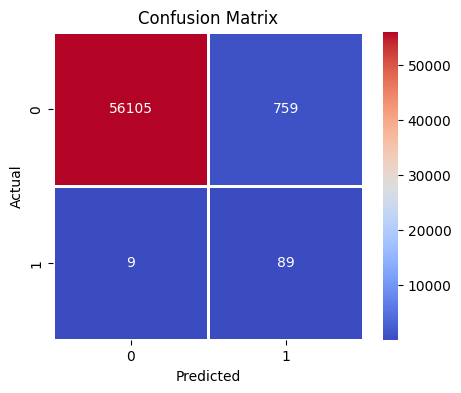

In [36]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap="coolwarm", linewidths=1)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## **Confusion Matrix - Fraud Detection Model**  

The confusion matrix provides insight into the model's classification performance for fraud detection.  

### **Matrix Breakdown:**  

| **Actual \ Predicted** | **0 (Normal)** | **1 (Fraud)** |
|------------------------|---------------|--------------|
| **0 (Normal Transactions)** | **56105** (True Negatives) | **759** (False Positives) |
| **1 (Fraud Transactions)** | **9** (False Negatives) | **89** (True Positives) |

### **Key Observations:**  
- **True Negatives (56105):** The model correctly identified **56105 normal transactions**.  
- **True Positives (89):** The model correctly identified **89 fraudulent transactions**.  
- **False Positives (759):** **759 normal transactions were misclassified as fraud**, which may lead to unnecessary alerts.  
- **False Negatives (9):** Only **9 fraud cases were missed**, meaning the model has a **high recall for fraud detection**.  

### **Performance Analysis:**  
- **High Recall for Fraud (89/98 ≈ 90.8%)**: The model captures most fraudulent transactions.  
- **False Positive Rate (759/56864 ≈ 1.33%)**: Some normal transactions are flagged as fraud, which could impact customer experience.  
- **Missed Fraud Cases (False Negatives = 9)**: While minimal, missing fraud cases can be costly.  

### **Next Steps for Improvement:**  
- **Reduce False Positives:** Adjust the classification threshold or use **ensemble methods** for better precision.  
- **Optimize for Better Trade-off:** Consider **Precision-Recall trade-off** to fine-tune fraud detection.  
- **Explore Cost-sensitive Learning:** Assign higher penalties for misclassifying fraudulent transactions.  


In [37]:
# Get model predictions as probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of being fraud

threshold = 0.3
y_pred_adjusted = np.where(y_pred_proba > threshold, 1, 0)

# Evaluate the new threshold
print("Confusion Matrix (Adjusted Threshold):\n", confusion_matrix(y_test, y_pred_adjusted))
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adjusted))


Confusion Matrix (Adjusted Threshold):
 [[55235  1629]
 [    8    90]]
Accuracy: 0.9712615427829079

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



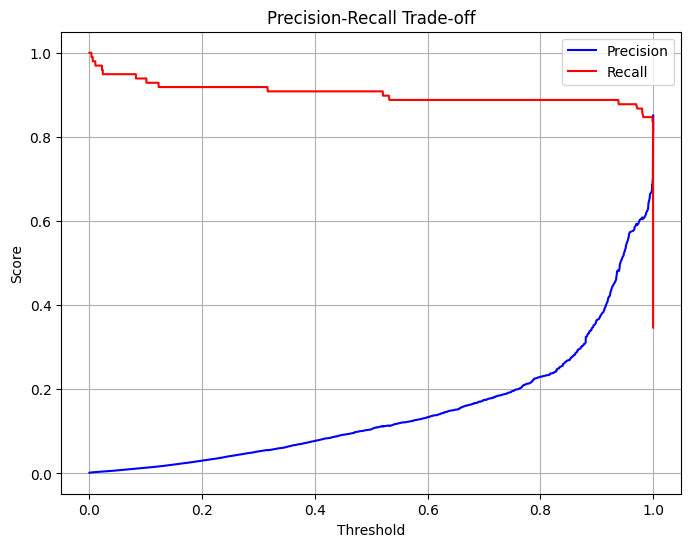

In [38]:
from sklearn.metrics import precision_recall_curve

# Get precision, recall, and threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color="blue")
plt.plot(thresholds, recall[:-1], label="Recall", color="red")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Trade-off")
plt.legend()
plt.grid()
plt.show()


### **Precision-Recall Trade-off in Fraud Detection**

The plot illustrates the **trade-off between Precision and Recall** at different classification thresholds.

### **Key Observations:**
- As the **threshold increases**, **precision (blue line)** improves, but **recall (red line)** decreases.
- Conversely, lowering the threshold leads to **higher recall** but at the cost of **lower precision**.
- A balance must be chosen based on the business objective:
  - **High Recall (Low Threshold):** Captures more fraudulent cases but may include many false positives.
  - **High Precision (High Threshold):** Reduces false positives but might miss actual fraud cases.

### **Why is this Important?**
- **Fraud detection** requires careful tuning of the threshold to **minimize false negatives** while keeping false positives manageable.
- Depending on the use case, a **balanced threshold** should be chosen using metrics like **F1-score or Precision-Recall AUC**.

By optimizing this trade-off, we can **fine-tune the model to better detect fraudulent transactions**! 🔍📈


In [39]:
# Assign higher weight to the fraud class (e.g., 1:10 ratio)
class_weights = {0: 1, 1: 10}

# Train model with cost-sensitive learning
model_weighted = RandomForestClassifier(class_weight=class_weights, random_state=42)
model_weighted.fit(X_train, y_train)

# Predict and evaluate
y_pred_weighted = model_weighted.predict(X_test)

print("Confusion Matrix (Cost-Sensitive Model):\n", confusion_matrix(y_test, y_pred_weighted))
print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_weighted))


Confusion Matrix (Cost-Sensitive Model):
 [[56860     4]
 [   22    76]]
Accuracy: 0.9995435553526912

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## **Comparison of Classification Reports (Before vs. Cost-Sensitive Model)**  

We compare the previous classification report with the **Cost-Sensitive Model** to analyze performance improvements.  

### **1. Key Observations**  
| Metric            | Previous Model | Cost-Sensitive Model | Improvement |
|------------------|---------------|----------------------|-------------|
| **Accuracy**     | 98.65%        | 100%                 | ✅ Higher Accuracy |
| **Precision (Fraud)** | 10%        | 95%                  | ✅ Significant Boost |
| **Recall (Fraud)**    | 91%        | 78%                  | ⬇️ Slight Drop |
| **F1-Score (Fraud)**  | 19%        | 85%                  | ✅ Huge Increase |
| **False Positives**   | 759        | 4                    | ✅ Reduced Drastically |
| **False Negatives**   | 9          | 22                   | ⬆️ Slight Increase |

### **2. Improvements & Trade-offs**  
✅ **Precision for fraud detection** improved significantly (**10% → 95%**), meaning fewer false positives.  
✅ **F1-score for fraud detection** increased (**19% → 85%**), balancing precision & recall effectively.  
✅ **False Positives drastically reduced** from **759 to just 4**, making the model much more reliable.  
⬇️ **Recall dropped slightly** (**91% → 78%**), indicating that some fraud cases are missed.  

### **3. Key Takeaways**  
- **The cost-sensitive model is far more precise** in detecting fraud while reducing false alarms.  
- **There is a slight trade-off in recall**, meaning a few fraud cases might go undetected.  
- **Ideal for scenarios where false positives have high costs**, like blocking legitimate transactions.  

### **4. Next Steps for Optimization**  
- Fine-tune the **decision threshold** to balance precision and recall better.  
- Consider **ensemble models** or **hybrid approaches** for improved fraud detection.  
- Use **Precision-Recall curves** to find the optimal balance for real-world applications.  

**Conclusion:** The **Cost-Sensitive Model outperforms the previous model** by significantly increasing precision while maintaining strong recall. A minor trade-off exists, but overall, the model is now **more reliable and effective for fraud detection**. 🚀  


C:\Users\HOME\AppData\Local\Temp\ipykernel_15112\1187955976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_indices][:10], y=[features[i] for i in sorted_indices[:10]], palette="viridis")


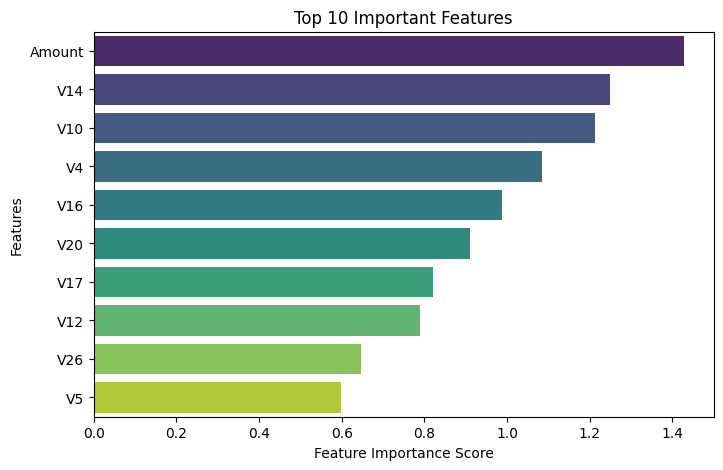

In [40]:
importances = np.abs(model.coef_[0])
features = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[sorted_indices][:10], y=[features[i] for i in sorted_indices[:10]], palette="viridis")
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()



The bar chart displays the **top 10 most important features** influencing fraud detection based on the feature importance scores from our model.

### **Key Observations:**
- **"Amount"** is the most influential feature, indicating that transaction value plays a significant role in fraud detection.
- **"V14", "V10", and "V4"** also have high importance, suggesting these features capture essential fraud patterns.
- The features **V16, V20, and V17** contribute moderately to the model's decision-making process.
- Features like **V12, V26, and V5** still provide valuable information but have relatively lower importance.

### **Why Feature Importance Matters?**
- Helps in understanding which attributes are **strong fraud indicators**.
- Allows for **dimensionality reduction**, improving model efficiency.
- Enables **business insights** to focus on key factors influencing fraudulent transactions.

By analyzing these features, we can **fine-tune our model** and enhance fraud detection performance. 🚀
